In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ted-technology-entertainment-and-design/TED talks data.csv


# Data load and lookup

In [2]:
tedtalks = pd.read_csv(
    '/kaggle/input/ted-technology-entertainment-and-design/TED talks data.csv', sep=';', engine='python', on_bad_lines='skip')

tedtalks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelTitle        4641 non-null   object 
 1   videoId             4641 non-null   object 
 2   title               4641 non-null   object 
 3   speaker             4641 non-null   object 
 4   viewCount           4641 non-null   int64  
 5   likeCount           4560 non-null   float64
 6   commentCount        4586 non-null   float64
 7   release_date        4641 non-null   object 
 8   release_time        4641 non-null   object 
 9   duration            4641 non-null   object 
 10  videoCategoryId     4641 non-null   int64  
 11  videoCategoryLabel  4641 non-null   object 
 12  topicCategories     4613 non-null   object 
 13  caption             4641 non-null   bool   
 14  tags                4637 non-null   object 
 15  videoDescription    4640 non-null   object 
dtypes: boo

In [3]:
tedtalks.head()

,channelTitle,videoId,title,speaker,viewCount,likeCount,commentCount,release_date,release_time,duration,videoCategoryId,videoCategoryLabel,topicCategories,caption,tags,videoDescription
0,TED,FzhI2D_kaCY,A Path to Social Safety for Migrant Workers,Ashif Shaikh,15697,288.0,27.0,2024-03-15,16:13:13,08:01,29,Nonprofits & Activism,Society,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,busine...",Hundreds of millions of migrant workers travel...
1,TED,rKj1CN9Ttok,"In the Age of AI Art, What Can Originality Loo...",Eileen Isagon Skyers,19448,653.0,14.0,2024-03-15,15:00:49,00:33,28,Science & Technology,NaN,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED",Eileen Isagon Skyers is an expert on digital a...
2,TED,5z_krRwSyt8,3 Mysteries of the Universe — and a New Force ...,Alex Keshavarzi,57682,1458.0,125.0,2024-03-14,11:00:07,13:30,28,Science & Technology,Knowledge,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,scienc...",We're still in the dark about what 95 percent ...
3,TED,P7slA-LkA3s,"When You Inform Women, You Transform Lives",Paige Alexander,11175,194.0,7.0,2024-03-13,17:06:58,09:40,22,People & Blogs,Society,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,busine...",Access to information is the key to unlocking ...
4,TED,0DfygE0QoJU,How To Write an Email,Victoria Turk,39236,1341.0,19.0,2024-03-13,16:00:01,00:54,28,Science & Technology,Society,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED","From subject line to sign-off, Victoria Turk g..."


# missing values

In [4]:
tedtalks.describe()
tedtalks.isna().sum()

channelTitle           0
videoId                0
title                  0
speaker                0
viewCount              0
likeCount             81
commentCount          55
release_date           0
release_time           0
duration               0
videoCategoryId        0
videoCategoryLabel     0
topicCategories       28
caption                0
tags                   4
videoDescription       1
dtype: int64

In [5]:
# Fill missing numeric columns
tedtalks['likeCount'] = tedtalks['likeCount'].fillna(0)
tedtalks['commentCount'] = tedtalks['commentCount'].fillna(0)

# Fill missing text columns
tedtalks['topicCategories'] = tedtalks['topicCategories'].fillna('Unknown')
tedtalks['tags'] = tedtalks['tags'].fillna('Unknown')
tedtalks['videoDescription'] = tedtalks['videoDescription'].fillna('No Description')

# Combine release_date and release_time
tedtalks['release_datetime'] = pd.to_datetime(tedtalks['release_date'] + ' ' + tedtalks['release_time'])

tedtalks['release_year'] = tedtalks['release_datetime'].dt.year
tedtalks['release_month'] = tedtalks['release_datetime'].dt.month
tedtalks['release_hour'] = tedtalks['release_datetime'].dt.hour

tedtalks['duration_sec'] = tedtalks['duration'].apply(
    lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':'))))
)

tedtalks['like_ratio'] = tedtalks['likeCount'] / tedtalks['viewCount']
tedtalks['comment_ratio'] = tedtalks['commentCount'] / tedtalks['viewCount']

tedtalks.head()

,channelTitle,videoId,title,speaker,viewCount,likeCount,commentCount,release_date,release_time,duration,...,caption,tags,videoDescription,release_datetime,release_year,release_month,release_hour,duration_sec,like_ratio,comment_ratio
0,TED,FzhI2D_kaCY,A Path to Social Safety for Migrant Workers,Ashif Shaikh,15697,288.0,27.0,2024-03-15,16:13:13,08:01,...,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,busine...",Hundreds of millions of migrant workers travel...,2024-03-15 16:13:13,2024,3,16,481,0.018347,0.001720
1,TED,rKj1CN9Ttok,"In the Age of AI Art, What Can Originality Loo...",Eileen Isagon Skyers,19448,653.0,14.0,2024-03-15,15:00:49,00:33,...,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED",Eileen Isagon Skyers is an expert on digital a...,2024-03-15 15:00:49,2024,3,15,33,0.033577,0.000720
2,TED,5z_krRwSyt8,3 Mysteries of the Universe — and a New Force ...,Alex Keshavarzi,57682,1458.0,125.0,2024-03-14,11:00:07,13:30,...,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,scienc...",We're still in the dark about what 95 percent ...,2024-03-14 11:00:07,2024,3,11,810,0.025277,0.002167
3,TED,P7slA-LkA3s,"When You Inform Women, You Transform Lives",Paige Alexander,11175,194.0,7.0,2024-03-13,17:06:58,09:40,...,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,busine...",Access to information is the key to unlocking ...,2024-03-13 17:06:58,2024,3,17,580,0.017360,0.000626
4,TED,0DfygE0QoJU,How To Write an Email,Victoria Turk,39236,1341.0,19.0,2024-03-13,16:00:01,00:54,...,True,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED","From subject line to sign-off, Victoria Turk g...",2024-03-13 16:00:01,2024,3,16,54,0.034178,0.000484


In [6]:
# Quick high-level stats
print("Total TED Talks:", len(tedtalks))
print("Unique Speakers:", tedtalks['speaker'].nunique())
print("Average Views:", tedtalks['viewCount'].mean())
print("Median Views:", tedtalks['viewCount'].median())
print("Most Common Category:", tedtalks['videoCategoryLabel'].mode()[0])


Total TED Talks: 4641
Unique Speakers: 3652
Average Views: 576093.0788623141
Median Views: 104368.0
Most Common Category: Science & Technology


# Data Visualization

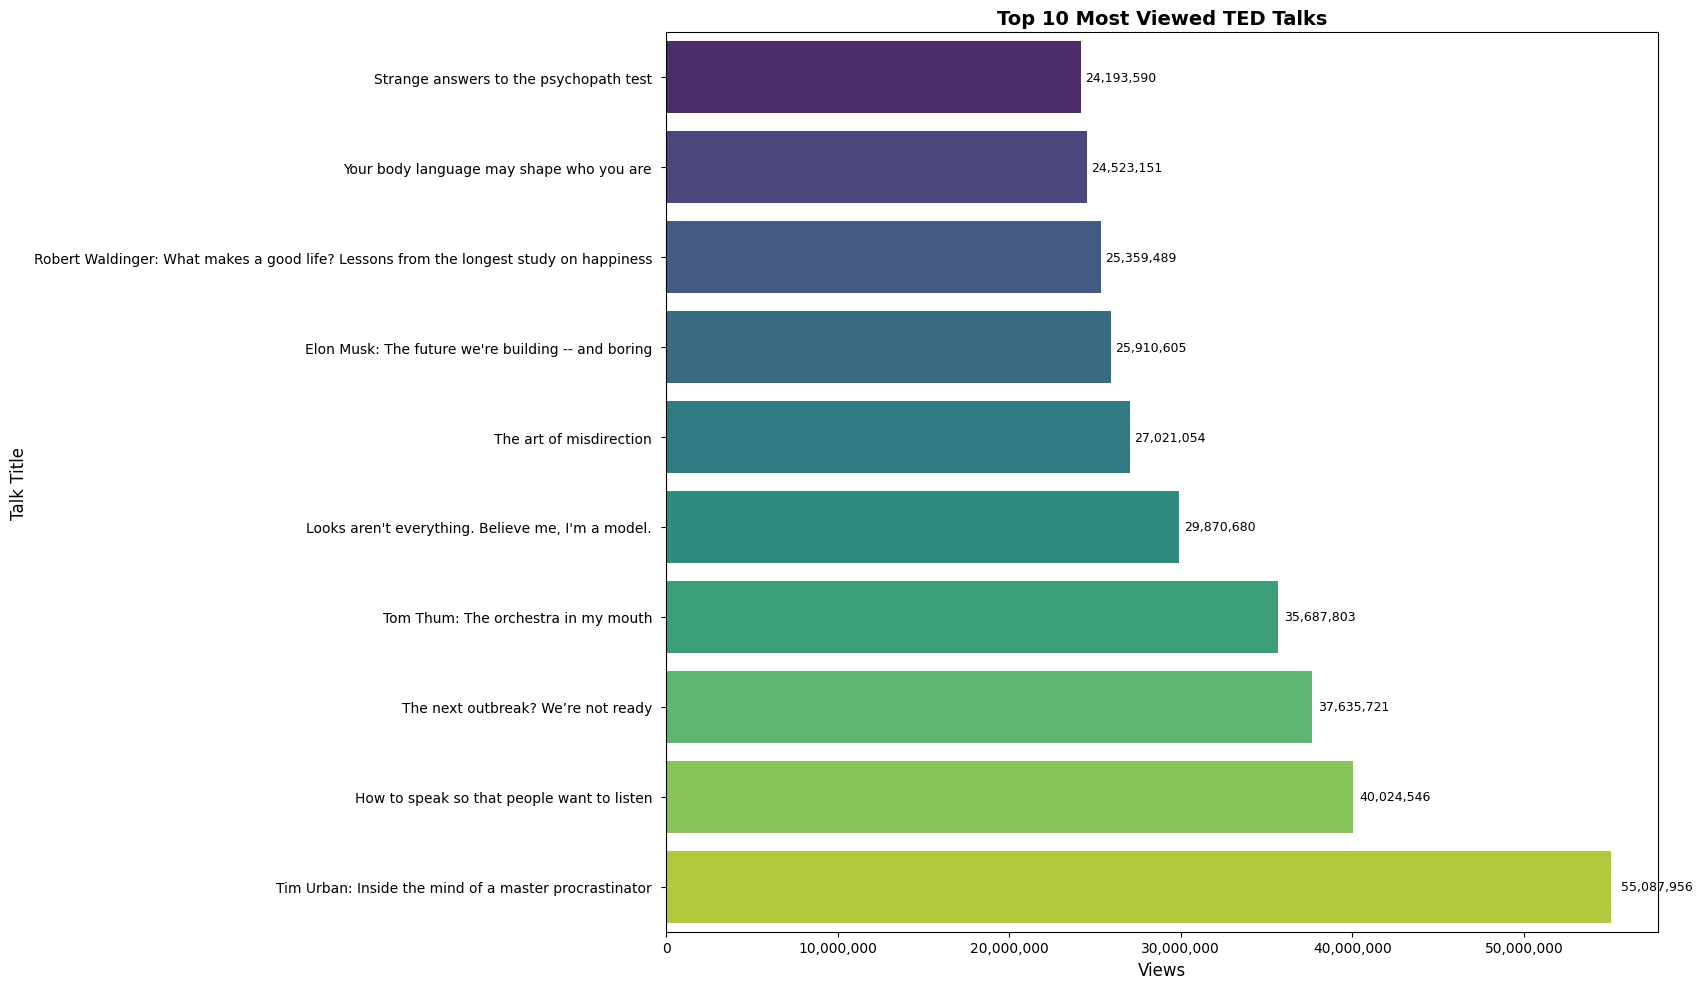

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Get top 10 by views, sort ascending for nicer y-order
top_views = tedtalks.nlargest(10, 'viewCount').sort_values('viewCount', ascending=True)

plt.figure(figsize=(17, 10))
ax = sns.barplot(x='viewCount', y='title', data=top_views, palette='viridis')

# Format x-axis with commas
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels on the bars
for i, (value, title) in enumerate(zip(top_views['viewCount'], top_views['title'])):
    ax.text(value + (value * 0.01), i, f'{int(value):,}', va='center', ha='left', fontsize=9, color='black')

plt.title("Top 10 Most Viewed TED Talks", fontsize=14, weight='bold')
plt.xlabel("Views", fontsize=12)
plt.ylabel("Talk Title", fontsize=12)
plt.tight_layout()
plt.show()


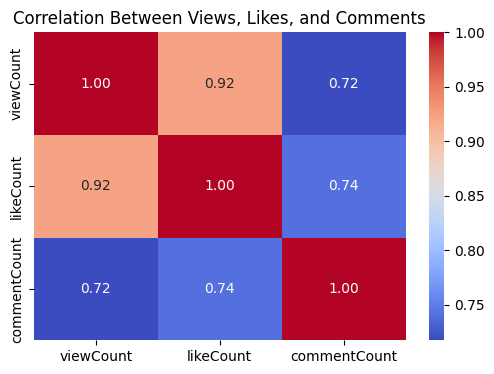

In [8]:
# Correlations Between Engagement Metrics
plt.figure(figsize=(6,4))
sns.heatmap(
    tedtalks[['viewCount','likeCount','commentCount']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation Between Views, Likes, and Comments")
plt.show()


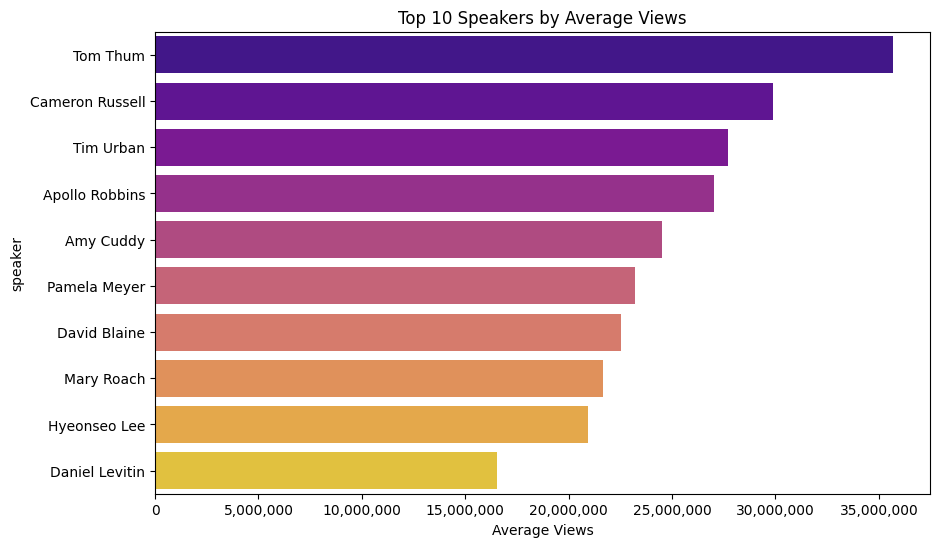

In [9]:
# Top 10 Speakers by Average Views
top_speakers = (tedtalks.groupby('speaker')['viewCount']
                .mean()
                .sort_values(ascending=False)
                .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_speakers.values, y=top_speakers.index, palette='plasma')
plt.title("Top 10 Speakers by Average Views")
plt.xlabel("Average Views")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


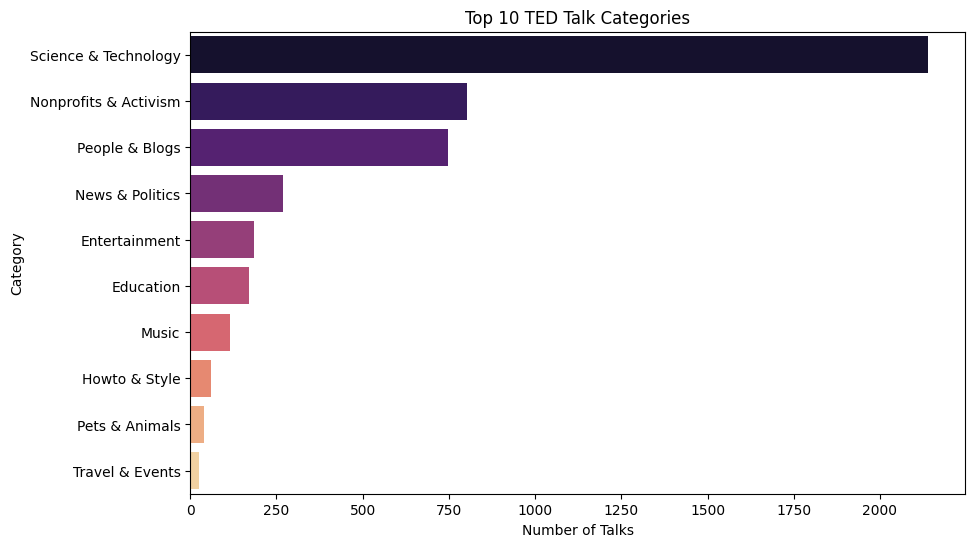

In [10]:
# Most Popular Categories

plt.figure(figsize=(10,6))
sns.barplot(
    x=tedtalks['videoCategoryLabel'].value_counts().values[:10],
    y=tedtalks['videoCategoryLabel'].value_counts().index[:10],
    palette='magma'
)
plt.title("Top 10 TED Talk Categories")
plt.xlabel("Number of Talks")
plt.ylabel("Category")
plt.show()


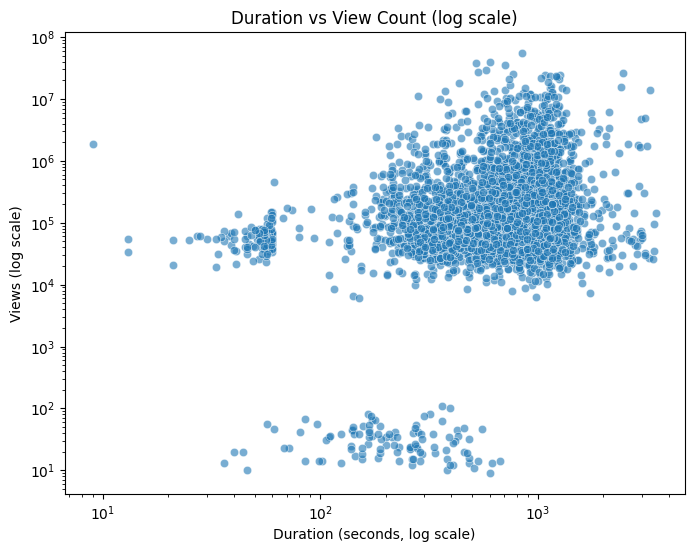

In [11]:
# Duration vs Views (Does longer mean better?)

plt.figure(figsize=(8,6))
sns.scatterplot(x='duration_sec', y='viewCount', data=tedtalks, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Duration vs View Count (log scale)")
plt.xlabel("Duration (seconds, log scale)")
plt.ylabel("Views (log scale)")
plt.show()


# Virality Prediction Model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       836
           1       0.91      0.94      0.92        93

    accuracy                           0.98       929
   macro avg       0.95      0.96      0.96       929
weighted avg       0.98      0.98      0.98       929

[[827   9]
 [  6  87]]


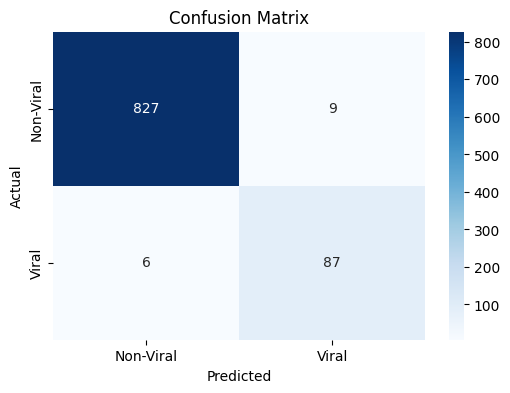

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create target: top 10% views = viral
threshold = tedtalks['viewCount'].quantile(0.90)
tedtalks['is_viral'] = (tedtalks['viewCount'] >= threshold).astype(int)

# Features
numeric_features = ['duration_sec', 'likeCount', 'commentCount', 'release_year']
text_features = ['tags', 'videoDescription']
X = tedtalks[numeric_features + text_features]
y = tedtalks['is_viral']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine text columns
def combine_text(df):
    return (df['tags'] + ' ' + df['videoDescription']).fillna('')

X_train_text = combine_text(X_train)
X_test_text = combine_text(X_test)

# TF-IDF for text
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text_tfidf = tfidf.fit_transform(X_train_text)
X_test_text_tfidf = tfidf.transform(X_test_text)

# Scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

# Combine text + numeric
X_train_combined = hstack([X_train_text_tfidf, X_train_num])
X_test_combined = hstack([X_test_text_tfidf, X_test_num])

# Train XGBoost
model = XGBClassifier(
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train_combined, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_combined)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Viral','Viral'], yticklabels=['Non-Viral','Viral'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Recommendation System

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

# Combine text for all talks
tedtalks['text'] = tedtalks['tags'].fillna('') + ' ' + tedtalks['videoDescription'].fillna('')

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(tedtalks['text'])

# Cosine similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend_talk_fuzzy(title, top_n=5):
    titles = tedtalks['title'].tolist()
    match = get_close_matches(title, titles, n=1, cutoff=0.5)  # find closest match
    if not match:
        print("No close match found. Try a different title.")
        return None
    
    idx = tedtalks[tedtalks['title'] == match[0]].index[0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recommended_idx = [i[0] for i in sim_scores]
    
    print(f"Showing recommendations for: {match[0]}")
    return tedtalks.iloc[recommended_idx][['title', 'speaker', 'viewCount']]

# Example
recommend_talk_fuzzy("write email")


Showing recommendations for: How To Write an Email 


,title,speaker,viewCount
2827,Andy Yen: Think your email's private? Think again,Andy Yen,354311
2711,"John Bohannon: Dance vs. powerpoint, a modest ...",John Bohannon,11167
2744,Ash Beckham: When to take a stand -- and when ...,Ash Beckham,117786
656,Stories of Photographing Monumental People (fr...,TED,41824
1796,"3 ways to create a space that moves you, from ...",David Korins,224019
